# Homoscedasticity

## Explanation:

Definition: Homoscedasticity means that the variance of the residuals (errors) is constant across all levels of the independent variables. In other words, the spread or "scatter" of the residuals should be roughly the same regardless of the predicted values.

Why It Matters: When homoscedasticity is violated (a condition known as heteroscedasticity), it suggests that the model's predictions are more or less accurate for certain ranges of the data, leading to inefficient estimates of the regression coefficients. This can also affect the validity of hypothesis tests and confidence intervals.

## How to Check:
 
- Residual Plot: The most common way to check for homoscedasticity is to plot the residuals against the fitted values (the predicted values).
    - If the residuals are randomly scattered around the horizontal axis (zero line) with no discernible pattern, homoscedasticity is likely satisfied.
    - Funnel Shape: If the residuals fan out or funnel (either widening or narrowing) as the fitted values increase, this indicates heteroscedasticity.

- Breusch-Pagan Test: This statistical test can also be used to formally detect heteroscedasticity.

## Example:

In a model predicting house prices based on square footage, suppose that the variance of the residuals increases as the square footage increases (perhaps because larger homes have more variability in features). This would result in a funnel shape in the residual plot, indicating heteroscedasticity.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic data
n = 100
x = np.linspace(0, 10, n)  # Independent variable

# Create heteroscedasticity: residuals increase with x
errors = np.random.normal(0, 1, n) * x  # Errors that increase with x

# Dependent variable with a linear relationship plus heteroscedastic errors
y = 2 * x + errors

# Step 2: Fit a linear regression model
X = sm.add_constant(x)  # Add intercept
model = sm.OLS(y, X).fit()

# Step 3: Calculate residuals and fitted values
fitted_values = model.fittedvalues
residuals = model.resid

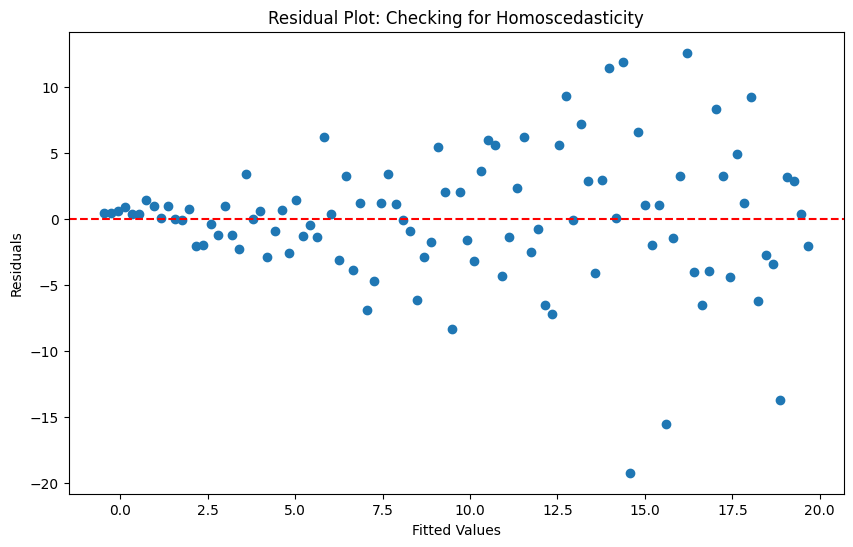

In [2]:
# Step 4: Plot residuals against fitted values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Checking for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [3]:
# Step 5: Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(12.057761395869049), 'p-value': np.float64(0.0005157719067545354), 'f-value': np.float64(13.436781182184506), 'f p-value': np.float64(0.00040076479593221924)}


Interpretation:
Residual Plot: The funnel shape in the residual plot indicates that the residuals' variance increases with the fitted values. This is a clear sign of heteroscedasticity.

Breusch-Pagan Test: The very low p-value (close to zero) from the Breusch-Pagan test confirms the presence of heteroscedasticity.

Implications:

Bias in Inferences: Heteroscedasticity can lead to inefficient estimates of regression coefficients and biased standard errors, making hypothesis tests and confidence intervals unreliable.

Possible Solutions:

- Transformations: Applying a transformation to the dependent variable (like logarithms) might stabilize the variance.
- Robust Standard Errors: Use heteroscedasticity-robust standard errors to correct the standard errors without altering the model structure.
- Weighted Least Squares: If the form of heteroscedasticity is known, you can use Weighted Least Squares (WLS) regression, which gives different weights to different observations based on their variance.